# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[1])

602
atuona


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#response = requests.get(query_url + cities[1]).json()
response = requests.get(query_url + "Paris").json()
city_city = []
city_lon = []
city_lat = []
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
city_date = []

In [4]:
for city in range(len(cities)):
    time.sleep(1)
    try:
        response = requests.get(query_url + cities[city]).json()
        print(city)
        city_lon.append(response["coord"]['lon'])
        city_lat.append(response["coord"]['lat'])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloudiness.append(response["clouds"]["all"])
        city_windspeed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response['dt'])
        city_city.append(cities[city])
    except:
        print("City Not Found")

0
1
2
3
4
5
6
7
8
9
10
City Not Found
11
12
13
14
15
16
City Not Found
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
City Not Found
41
42
43
44
45
46
47
48
49
50
City Not Found
51
52
53
54
55
56
57
58
59
City Not Found
60
61
62
63
64
65
66
67
68
69
70
71
City Not Found
72
73
City Not Found
74
75
76
77
78
79
80
81
82
83
84
City Not Found
85
86
87
88
89
90
City Not Found
91
92
93
94
95
96
97
98
City Not Found
99
100
101
102
103
104
105
106
City Not Found
107
108
109
110
City Not Found
111
112
113
114
115
116
117
City Not Found
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
City Not Found
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
City Not Found
170
171
172
173
174
175
176
City Not Found
177
178
City Not Found
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_lon

[-120.4579,
 -139.0333,
 168.8643,
 19.2345,
 -72.3287,
 -175.2,
 -50.0119,
 80.5464,
 -68.3,
 -114.3525,
 115.3333,
 15.6514,
 -173.9833,
 140.8333,
 -39.9167,
 14.2845,
 -79.2353,
 125.4092,
 -70.7581,
 139.9,
 -40.2925,
 150.7967,
 -73.9662,
 105.7244,
 -4.6167,
 -57.5575,
 -17.9182,
 -2.5,
 158.6483,
 172.7902,
 150.8667,
 -156.7887,
 20.0403,
 -151.3333,
 121.1114,
 -35.4608,
 -134.9692,
 -37.6368,
 -24.4956,
 26.891,
 -9.4469,
 113.3667,
 -69.3632,
 175.5153,
 -70.9167,
 147.0587,
 -73.65,
 17.0079,
 15.6401,
 -159.775,
 92.75,
 113.6333,
 170.5036,
 122.6711,
 100.3354,
 -90.5833,
 30.4684,
 8.834,
 -108.0014,
 63.071,
 166.1,
 -133.0374,
 -63.5724,
 30.7861,
 102.2655,
 -135.0107,
 128.8694,
 102.0442,
 -97.8558,
 129.4833,
 161.3,
 121.9,
 150.6667,
 -90.3518,
 71.7189,
 -52.3158,
 103.4609,
 152.35,
 -53.4616,
 -58.6198,
 29.0864,
 43.975,
 -50.9494,
 -17.1,
 37.1841,
 93.45,
 150.1667,
 148.8833,
 18.4232,
 -81.7006,
 149.2,
 -77.8487,
 108.0108,
 -73.414,
 34.7642,
 -155.09

In [6]:
city_info_df = pd.DataFrame({"City": city_city,
                             "Lat": city_lat,
                             "Lng": city_lon,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_cloudiness,
                             "Wind Speed": city_windspeed,
                             "Country": city_country,
                             "Date": city_date
                             })
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,53.60,82,1,16.11,US,1613182327
1,atuona,-9.8000,-139.0333,78.93,79,1,15.77,PF,1613182328
2,mataura,-46.1927,168.8643,73.99,52,85,1.99,NZ,1613182329
3,hermanus,-34.4187,19.2345,72.00,79,0,3.00,ZA,1613182330
4,palmer,42.1584,-72.3287,23.00,45,90,2.10,US,1613182148
...,...,...,...,...,...,...,...,...,...
553,miraflores,19.2167,-98.8083,60.80,25,40,12.66,MX,1613183018
554,union city,37.5958,-122.0192,55.00,76,40,11.50,US,1613183020
555,carahue,-38.7000,-73.1667,55.40,82,0,6.91,CL,1613183021
556,key west,24.5557,-81.7826,77.00,88,20,9.22,US,1613182901


In [7]:
city_info_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_city_data = city_info_df[city_info_df["Humidity"]<=100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,53.60,82,1,16.11,US,1613182327
1,atuona,-9.8000,-139.0333,78.93,79,1,15.77,PF,1613182328
2,mataura,-46.1927,168.8643,73.99,52,85,1.99,NZ,1613182329
3,hermanus,-34.4187,19.2345,72.00,79,0,3.00,ZA,1613182330
4,palmer,42.1584,-72.3287,23.00,45,90,2.10,US,1613182148
...,...,...,...,...,...,...,...,...,...
553,miraflores,19.2167,-98.8083,60.80,25,40,12.66,MX,1613183018
554,union city,37.5958,-122.0192,55.00,76,40,11.50,US,1613183020
555,carahue,-38.7000,-73.1667,55.40,82,0,6.91,CL,1613183021
556,key west,24.5557,-81.7826,77.00,88,20,9.22,US,1613182901


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_over_100 = city_info_df[city_info_df["Humidity"]>100].index.values.tolist()
humid_over_100

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Already done above
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,53.60,82,1,16.11,US,1613182327
1,atuona,-9.8000,-139.0333,78.93,79,1,15.77,PF,1613182328
2,mataura,-46.1927,168.8643,73.99,52,85,1.99,NZ,1613182329
3,hermanus,-34.4187,19.2345,72.00,79,0,3.00,ZA,1613182330
4,palmer,42.1584,-72.3287,23.00,45,90,2.10,US,1613182148
...,...,...,...,...,...,...,...,...,...
553,miraflores,19.2167,-98.8083,60.80,25,40,12.66,MX,1613183018
554,union city,37.5958,-122.0192,55.00,76,40,11.50,US,1613183020
555,carahue,-38.7000,-73.1667,55.40,82,0,6.91,CL,1613183021
556,key west,24.5557,-81.7826,77.00,88,20,9.22,US,1613182901


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Maximum Temperature in Degrees (F)')

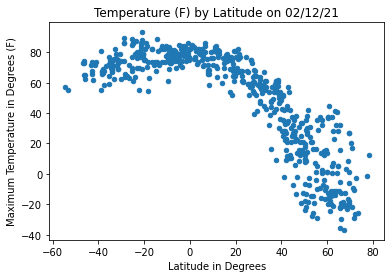

In [20]:
today_date=datetime.today().strftime('%m/%d/%y')
latvstemp=clean_city_data.plot.scatter("Lat","Max Temp", title=(f"Temperature (F) by Latitude on {today_date}"))
latvstemp.set_xlabel("Latitude in Degrees")
latvstemp.set_ylabel("Maximum Temperature in Degrees (F)")

### In this graph, it is measuring maximum temperature by degrees of latitude. As we can see, there is a clear correlation between the two. As the latitude gets farther from zero, the temperature decreases, while the temperatures around 0 degrees latitude are much hotter

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity in Percent (%)')

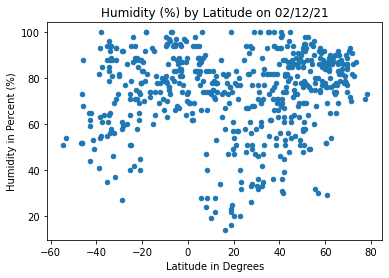

In [22]:
latvshum=clean_city_data.plot.scatter("Lat","Humidity", title=(f"Humidity (%) by Latitude on {today_date}"))
latvshum.set_xlabel("Latitude in Degrees")
latvshum.set_ylabel("Humidity in Percent (%)")

### Here, it is measuring humidity against latitude. There is not as clear of a correlation this time, but still some. The latitudes near 0 have humidities that are higher. Specifically, the lattitudes between -15 and 5 have no humidities below 60%. All the other latitudes are very inconsistent.

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness in Percent (%)')

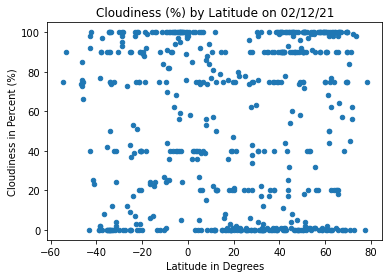

In [23]:
latvscloud=clean_city_data.plot.scatter("Lat","Cloudiness", title=(f"Cloudiness (%) by Latitude on {today_date}"))
latvscloud.set_xlabel("Latitude in Degrees")
latvscloud.set_ylabel("Cloudiness in Percent (%)")

### This graph is measuring cloudiness by latitude. There is no correlation I can see, but the majority of cloudiness percentages (regardless of latitude) are either 0% or 100%. "Partly cloudy" doesn't seem as common.

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (MPH)')

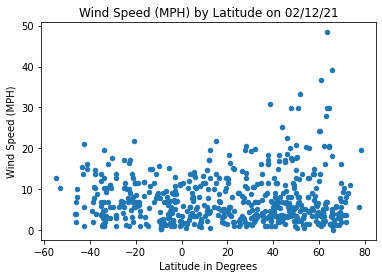

In [24]:
latvscloud=clean_city_data.plot.scatter("Lat","Wind Speed", title=(f"Wind Speed (MPH) by Latitude on {today_date}"))
latvscloud.set_xlabel("Latitude in Degrees")
latvscloud.set_ylabel("Wind Speed (MPH)")

### This graph shows wind speed versus latitude. The clearest correlation on this graph is that the northern latitudes (>=40 degrees) have potential for very high winds. All the other latitudes have wind speeds <= 25 MPH.

## Linear Regression

In [28]:
#northern hemisphere
clean_north = clean_city_data[clean_city_data["Lat"]>0]
#southern hemisphere
clean_south = clean_city_data[clean_city_data["Lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

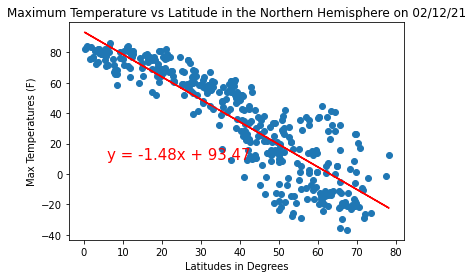

In [29]:
x_values = clean_north['Lat']
y_values = clean_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Max Temperatures (F)')
plt.title(f"Maximum Temperature vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

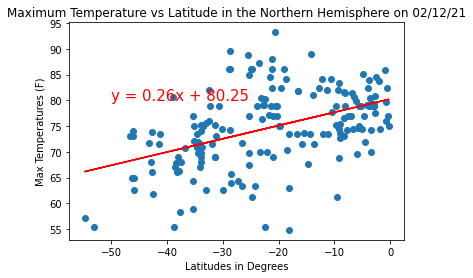

In [43]:
x_values = clean_south['Lat']
y_values = clean_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Max Temperatures (F)')
plt.title(f"Maximum Temperature vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

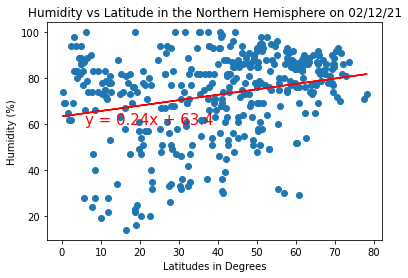

In [33]:
x_values = clean_north['Lat']
y_values = clean_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,60),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Humidity (%)')
plt.title(f"Humidity vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

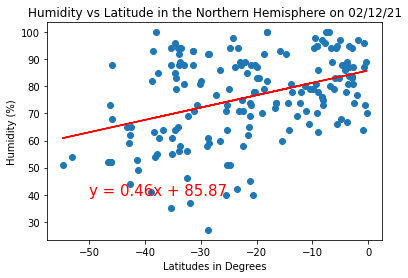

In [41]:
x_values = clean_south['Lat']
y_values = clean_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Humidity (%)')
plt.title(f"Humidity vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

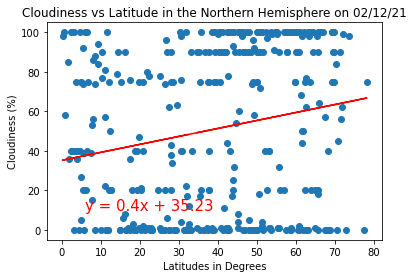

In [31]:
x_values = clean_north['Lat']
y_values = clean_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Cloudiness (%)')
plt.title(f"Cloudiness vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

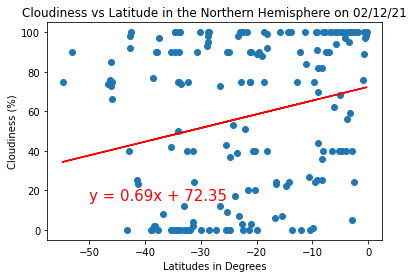

In [39]:
x_values = clean_south['Lat']
y_values = clean_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Cloudiness (%)')
plt.title(f"Cloudiness vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

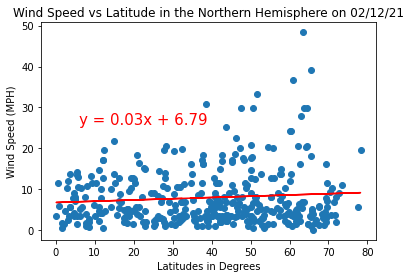

In [34]:
x_values = clean_north['Lat']
y_values = clean_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,26),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"Wind Speed vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

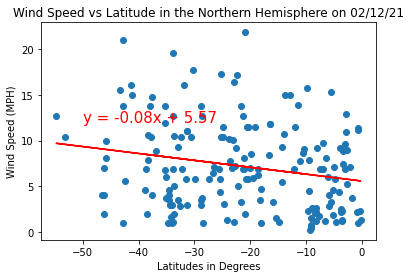

In [36]:
x_values = clean_south['Lat']
y_values = clean_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitudes in Degrees')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"Wind Speed vs Latitude in the Northern Hemisphere on {today_date}")
plt.show()